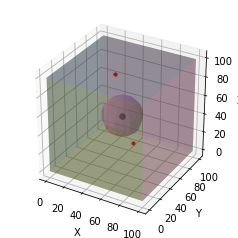

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from itertools import product, combinations

# draw cube

#nodes in the cube
#points = np.array([[0, 0, 0],
#                      [100, 0, 0 ],
#                      [100, 100, 0],
#                      [0, 100, 0],
#                      [0, 0, 100],
#                      [100, 0, 100 ],
#                      [100, 100, 100],
#                      [0, 100, 100]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [0,100]
X, Y = np.meshgrid(r, r)
#alpha represent the transparency level
ax.plot_surface(X,Y,100, alpha=0.3)
ax.plot_surface(X,Y,0, alpha=0.3)
ax.plot_surface(X,0,Y, alpha=0.3)
ax.plot_surface(X,100,Y, alpha=0.3)
ax.plot_surface(100,X,Y, alpha=0.3)
ax.plot_surface(0,X,Y, alpha=0.3)
#ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
x = 50+20*np.cos(u)*np.sin(v)
y = 50+20*np.sin(u)*np.sin(v)
z = 50+20*np.cos(v)
ax.plot_surface(x,y,z, alpha=0.4)
#ax.plot_wireframe(x, y, z, color="g")

# draw a point
ax.scatter([50], [50], [50], color="black", s=30)
ax.scatter([30], [70], [80], color="r", s=10)
ax.scatter([50], [70], [10], color="r", s=10)
plt.show()